<a href="https://colab.research.google.com/github/davidfague/Neural-Modeling/blob/main/synaptic_weights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Initialize parameters
exc_gmax_std_0 = 0.345
exc_gmax_clip = [0,0.7]#(0, 0.7)
gmax_scalar = 1
size = 10000

# Different exc_gmax_mean_0 values for comparison
exc_gmax_mean_0_values = [0.15, 0.2, 0.45]

# Dictionary to store computed KDEs
kde_data = {}

# Dictionary to store integrals to local minima
integral_values = {}

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import integrate, signal

# Function to compute log-normal distribution samples
def log_norm_dist(exc_gmax_mean_0, exc_gmax_std_0, gmax_scalar, size, exc_gmax_clip):
    gmax_mean = np.log(exc_gmax_mean_0) - 0.5 * np.log((exc_gmax_std_0 / exc_gmax_mean_0) ** 2 + 1)
    gmax_std = np.sqrt(np.log((exc_gmax_std_0 / exc_gmax_mean_0) ** 2 + 1))

    val = np.random.lognormal(gmax_mean, gmax_std, size)
    clipped_val = gmax_scalar * np.clip(val, exc_gmax_clip[0], exc_gmax_clip[1])
    not_clipped_val = gmax_scalar * val

    return clipped_val, not_clipped_val

# Compute the KDE
def compute_kde(samples):
    kernel = sns.kdeplot(samples).get_lines()[0]
    x = kernel.get_xdata()
    y = kernel.get_ydata()
    plt.close()  # This prevents the plot from displaying
    return x, y

# Function to find local minima and compute integral up to that point
def integral_to_minima(x, y, label):
    local_minima = signal.argrelextrema(y, np.less)

    if len(local_minima[0]) == 0:
        print(f"{label}: No local minima found.")
        return None

    stop_index = local_minima[0][0]
    stop_x_value = x[stop_index]

    print(f"{label}: First local minima occurs at x = {stop_x_value:.2f} nS.")

    integral_value, _ = integrate.quad(lambda i: np.interp(i, x, y), 0, stop_x_value, limit=200)


    print(f"{label}: Integral from 0 to first local minima ({stop_x_value:.2f} nS) is {integral_value:.2f}.")
    return integral_value

# Plotting function for stored KDEs
def plot_kdes(kde_data):
    plt.figure(figsize=(15, 8))

    for label, (x, y) in kde_data.items():
        plt.plot(x, y, label=label)

    plt.title("Comparing Clipped and Not Clipped Distributions for Different gmax_mean Values")
    plt.xlabel("Value")
    plt.ylabel("Density")
    plt.legend()
    plt.show()

Clipped_Mean_0=0.15: Mean = 0.13 nS, Std = 0.16 nS
Not_Clipped_Mean_0=0.15: Mean = 0.15 nS, Std = 0.30 nS
Clipped_Mean_0=0.2: Mean = 0.17 nS, Std = 0.18 nS
Not_Clipped_Mean_0=0.2: Mean = 0.20 nS, Std = 0.35 nS
Clipped_Mean_0=0.45: Mean = 0.39 nS, Std = 0.20 nS
Not_Clipped_Mean_0=0.45: Mean = 0.45 nS, Std = 0.35 nS


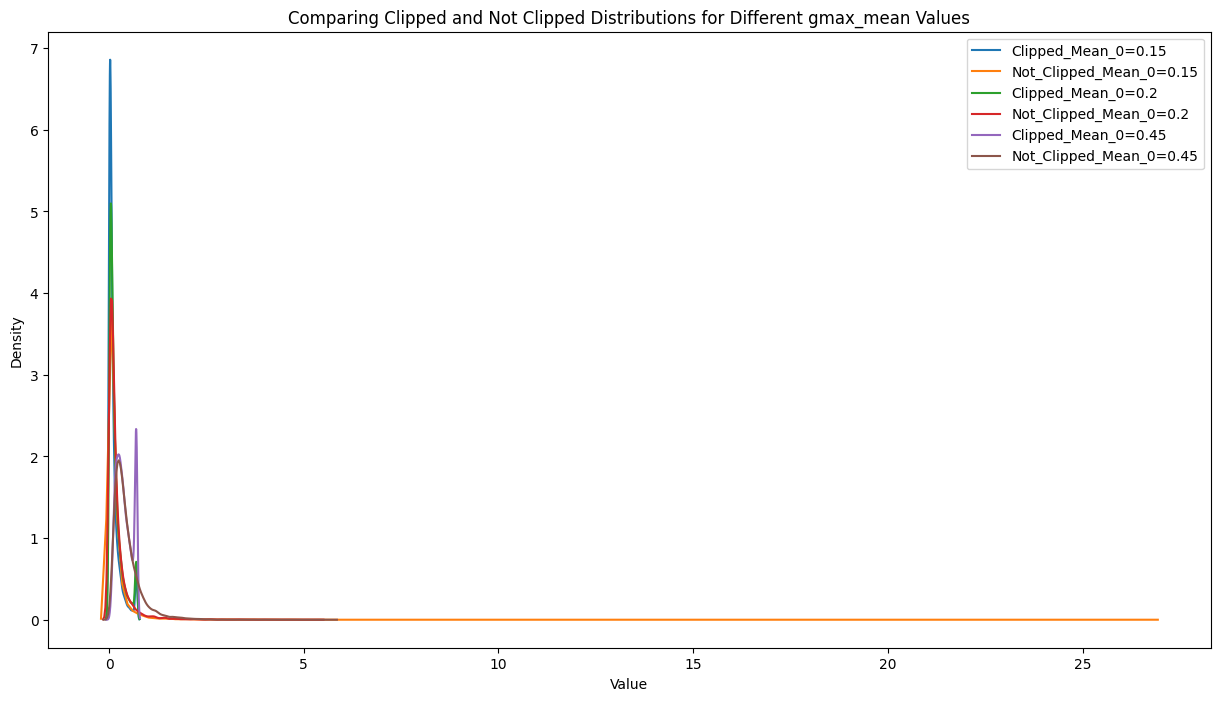

In [3]:
# Generate and store KDEs
for mean_0 in exc_gmax_mean_0_values:
    clipped_samples, not_clipped_samples = log_norm_dist(mean_0, exc_gmax_std_0, gmax_scalar, size, exc_gmax_clip)

    kde_data[f"Clipped_Mean_0={mean_0}"] = compute_kde(clipped_samples)
    kde_data[f"Not_Clipped_Mean_0={mean_0}"] = compute_kde(not_clipped_samples)

# Compute and store KDEs and corresponding integrals
for mean_0 in exc_gmax_mean_0_values:
    clipped_samples, not_clipped_samples = log_norm_dist(mean_0, exc_gmax_std_0, gmax_scalar, size, exc_gmax_clip)

    clipped_label = f"Clipped_Mean_0={mean_0}"
    not_clipped_label = f"Not_Clipped_Mean_0={mean_0}"

    # Compute mean and std for clipped and not_clipped samples
    mean_clipped = np.mean(clipped_samples)
    std_clipped = np.std(clipped_samples)

    mean_not_clipped = np.mean(not_clipped_samples)
    std_not_clipped = np.std(not_clipped_samples)

    print(f"{clipped_label}: Mean = {mean_clipped:.2f} nS, Std = {std_clipped:.2f} nS")
    print(f"{not_clipped_label}: Mean = {mean_not_clipped:.2f} nS, Std = {std_not_clipped:.2f} nS")

# Plot stored KDEs
plot_kdes(kde_data)